In [1]:
#importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#importing dataset
from sklearn.datasets import make_regression

In [14]:
X,y = make_regression(n_samples = 500 ,n_features = 1,noise = 25,bias = 10)

<function matplotlib.pyplot.show(*args, **kw)>

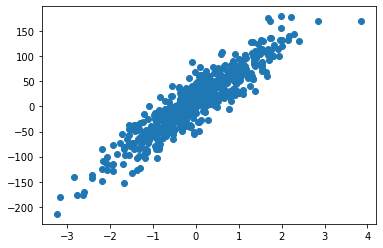

In [15]:
plt.scatter(X,y)
plt.show

In [16]:
"""Our data needs to be split in 2 parts
    - Training Data
    - Testing Data"""
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split]
X_test = X[split:]

Y_train = y[:split]
Y_test = y[split:]

print(X_train.shape)
print(X_test.shape)

print(Y_test.shape)

400
(400, 1)
(100, 1)
(100,)


In [17]:
## Methods we need to write
#mathematical way of linear regression model
def hypothesis(x,theta):
    return theta[0] + x*theta[1]

In [18]:
def get_error(X, Y, theta):
     err = 0.0
     m = X.shape[0]
    
     for i in range(m):
         h = hypothesis(X[i], theta)
         err += (Y[i] - h)**2
        
     err = err/2*m
     return err

In [19]:
def get_grad(X,Y,theta):
     grad_0 = 0.0
     grad_1 = 0.0
    
     grad = np.zeros((2,))
    
     m = X.shape[0]
    
     for i in range(m):
         h = hypothesis(X[i],theta)
         grad[0] += (h - Y[i])
         grad[1] += (h - Y[i])*(X[i])
        
     grad[0] = grad[0]/m
     grad[1] = grad[1]/m
    
     return grad

In [20]:
def gradient_descent(X,Y,learning_rate = 0.01):
     error_list = []
     theta = np.zeros((2,))
    
     i = 0
     max_iter = 500
     for i in range (max_iter):
         g = get_grad(X,Y,theta)
         e = get_error(X,Y,theta)
         error_list.append(e)
        
         theta[0] -= learning_rate*g[0]
         theta[1] -= learning_rate*g[1]
        
         i += 1
        
     return theta, error_list

In [21]:
theta_final, errors = gradient_descent(X_train,Y_train)

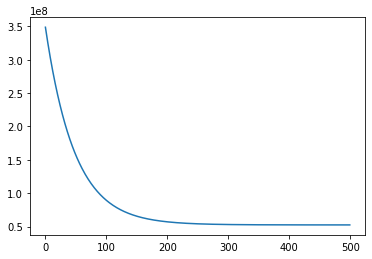

In [22]:
plt.plot(errors)
plt.show()

#print(loss[-1])

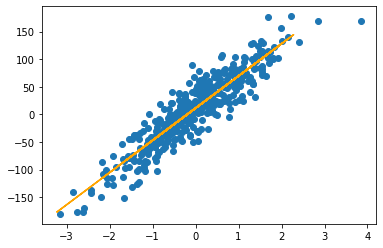

In [23]:
plt.scatter(X_train,Y_train)
plt.plot(X_test,hypothesis(X_test,theta_final), color = "orange")